In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

##Introduction to SURF

Количество ключевых точек (без фильтрации): 1609


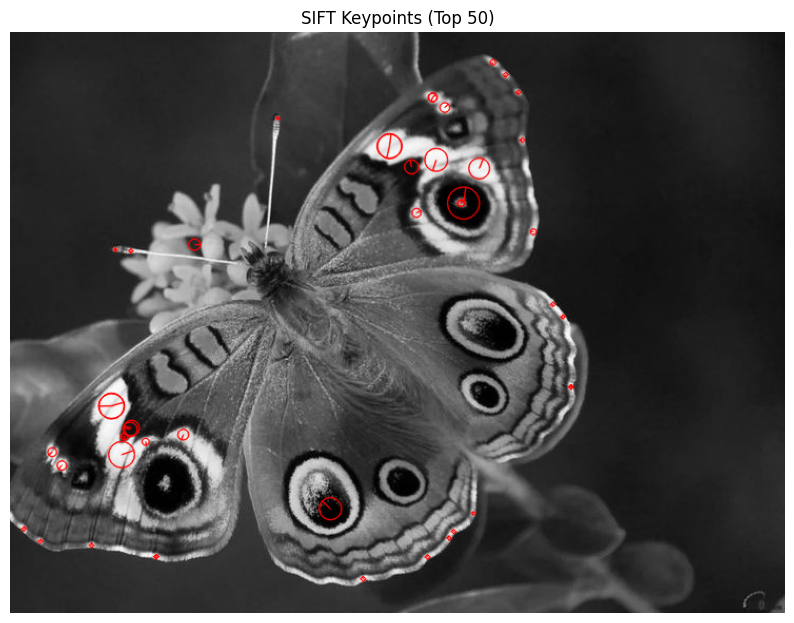

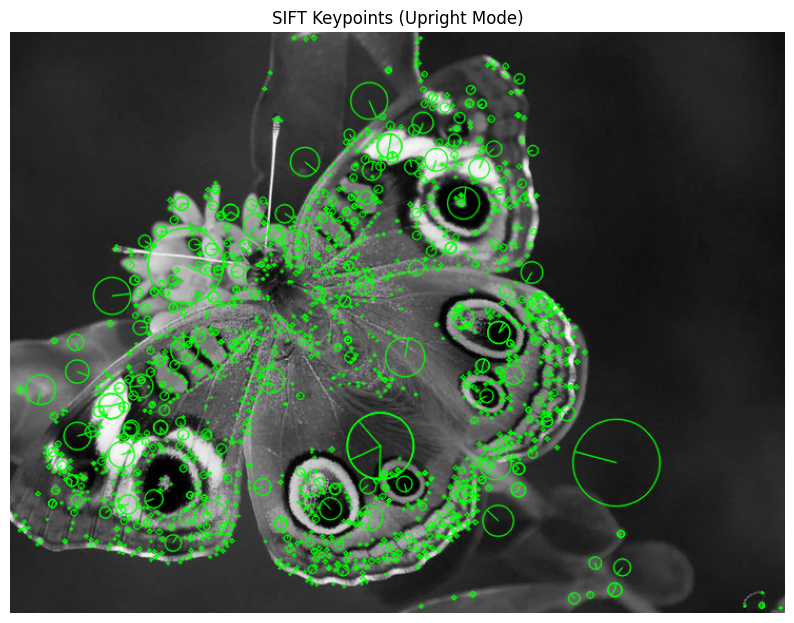

Размер дескрипторов: 128-мерный
Количество дескрипторов: 1609
Форма дескрипторов: (1609, 128)


In [2]:

# Загрузка изображения в градации серого
img = cv.imread('fly.jpg', cv.IMREAD_GRAYSCALE)

# Создание объекта SIFT с определением порогов и параметров
sift = cv.SIFT_create()

# Вычисление ключевых точек и дескрипторов
kp, des = sift.detectAndCompute(img, None)
print(f"Количество ключевых точек (без фильтрации): {len(kp)}")

# Уменьшение количества ключевых точек для наглядности
kp = sorted(kp, key=lambda x: -x.response)[:50]  # Оставляем 50 ключевых точек

# Отрисовка ключевых точек на изображении
img_with_keypoints = cv.drawKeypoints(
    img, kp, None, color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Вывод изображения с ключевыми точками
plt.figure(figsize=(10, 10))
plt.title("SIFT Keypoints (Top 50)")
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis('off')
plt.show()

# Включение режима "без ориентации" (аналог U-SURF)
kp_upright = sift.detect(img, None)  # Ключевые точки без ориентации
img_upright = cv.drawKeypoints(
    img, kp_upright, None, color=(0, 255, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Вывод изображения с ключевыми точками без ориентации
plt.figure(figsize=(10, 10))
plt.title("SIFT Keypoints (Upright Mode)")
plt.imshow(img_upright, cmap='gray')
plt.axis('off')
plt.show()

# Проверка размерности дескрипторов
print(f"Размер дескрипторов: {des.shape[1]}-мерный")

# Проверка всех дескрипторов
kp, des = sift.detectAndCompute(img, None)
print(f"Количество дескрипторов: {des.shape[0]}")
print(f"Форма дескрипторов: {des.shape}")

##FAST Algorithm for Corner Detection

Threshold: 10
Nonmax Suppression: True
Neighborhood: 2
Total Keypoints with Nonmax Suppression: 475


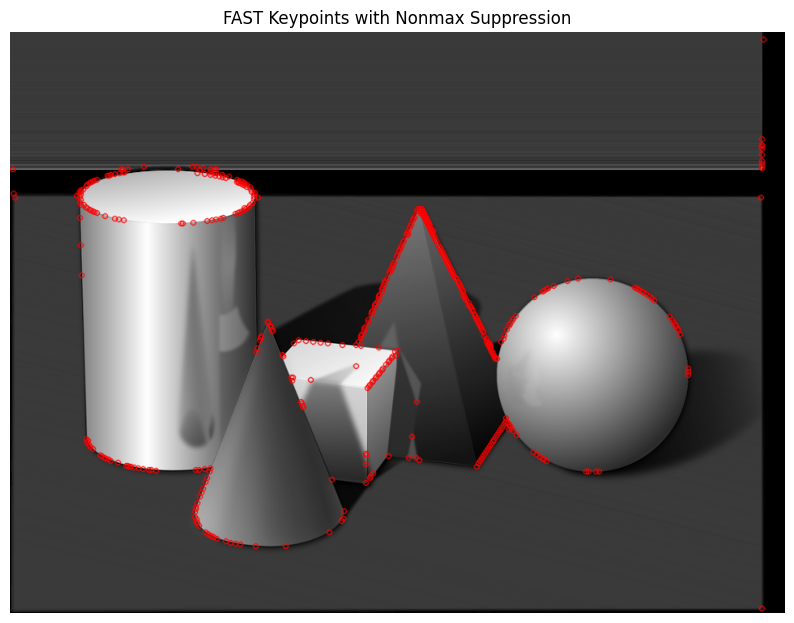

Total Keypoints without Nonmax Suppression: 1326


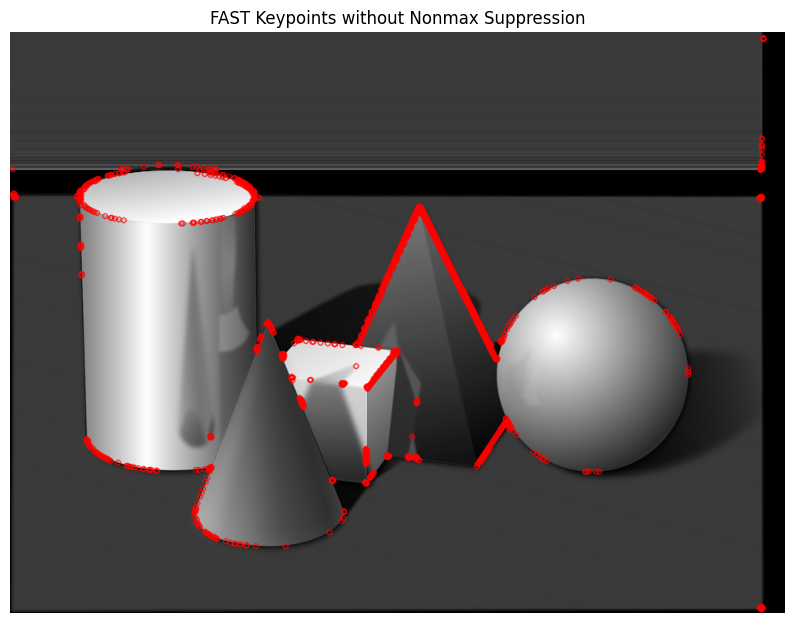

In [3]:
# Загрузка изображения в градациях серого
img = cv.imread('figs.png', cv.IMREAD_GRAYSCALE)

# Инициализация объекта FAST с настройками по умолчанию
fast = cv.FastFeatureDetector_create()

# Найти ключевые точки и нарисовать их на изображении
kp = fast.detect(img, None)
img_with_keypoints = cv.drawKeypoints(img, kp, None, color=(255, 0, 0))

# Вывод параметров FAST
print(f"Threshold: {fast.getThreshold()}")
print(f"Nonmax Suppression: {fast.getNonmaxSuppression()}")
print(f"Neighborhood: {fast.getType()}")
print(f"Total Keypoints with Nonmax Suppression: {len(kp)}")

# Вывод изображения с ключевыми точками и подавлением немаксимумов
plt.figure(figsize=(10, 10))
plt.title("FAST Keypoints with Nonmax Suppression")
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis('off')
plt.show()

# Отключение подавления немаксимумов
fast.setNonmaxSuppression(0)

# Повторное обнаружение ключевых точек без подавления немаксимумов
kp_no_suppression = fast.detect(img, None)
img_without_nonmax = cv.drawKeypoints(img, kp_no_suppression, None, color=(255, 0, 0))

# Вывод количества ключевых точек
print(f"Total Keypoints without Nonmax Suppression: {len(kp_no_suppression)}")

plt.figure(figsize=(10, 10))
plt.title("FAST Keypoints without Nonmax Suppression")
plt.imshow(img_without_nonmax, cmap='gray')
plt.axis('off')
plt.show()


##BRIEF

Shape of descriptor matrix: (354, 32)


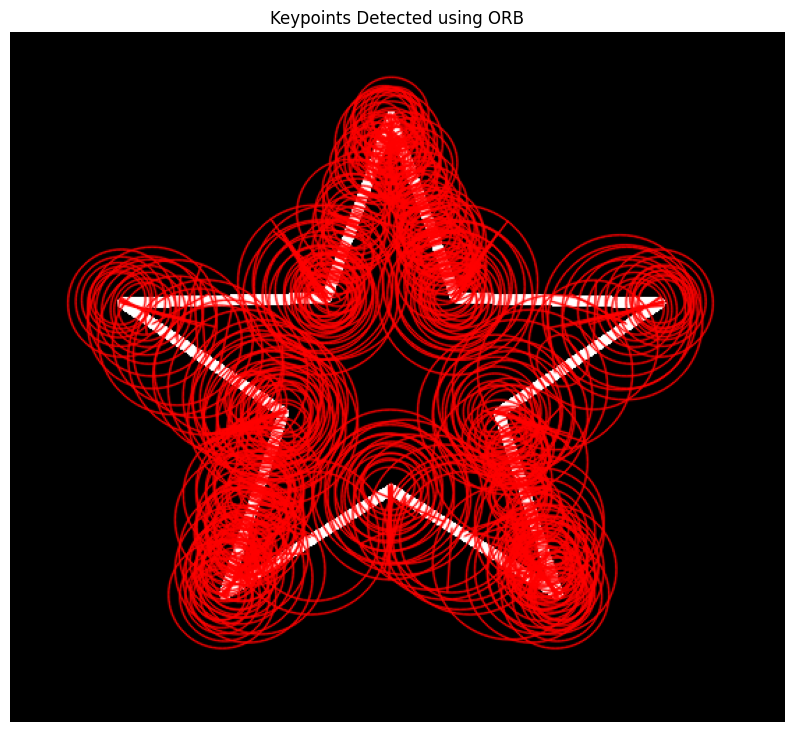

In [6]:
# Загрузка изображения в градациях серого
img = cv.imread('star.png', cv.IMREAD_GRAYSCALE)

# Инициализация детектора и экстрактора дескрипторов ORB
orb = cv.ORB_create()

# Обнаружение ключевых точек и вычисление дескрипторов
kp, des = orb.detectAndCompute(img, None)

# Вывод информации о дескрипторах
print(f"Shape of descriptor matrix: {des.shape}")

# Визуализация ключевых точек на изображении
img_with_keypoints = cv.drawKeypoints(img, kp, None, color=(255, 0, 0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 10))
plt.title("Keypoints Detected using ORB")
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis('off')
plt.show()